<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.4
# *PCA Lab*

**In this lab, we will:**
- Explore how PCA is related to correlation.
- Use PCA to perform dimensionality reduction.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
# IMPORT LABRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
breast_cancer_csv = r"D:\Download\DataScience\Files\Week301023_Clustering\breast-cancer-wisconsin-data.csv"
df = pd.read_csv(breast_cancer_csv)

### 2. EDA

Explore dataset. Clean data. Find correlation.

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [35]:
df.shape

(569, 31)

In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
# Dropping column 'id' and 'unnamed'. ID won't contribute anything to the ML model and Unnamed is simply column of null values
df.drop(columns = ['id', 'Unnamed: 32'], inplace=True)

In [7]:
# Saw B on head() and M as well.. But just to be sure there isn't any other value
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
# Changing B (benign) to 0 and M (malicious) to 1
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

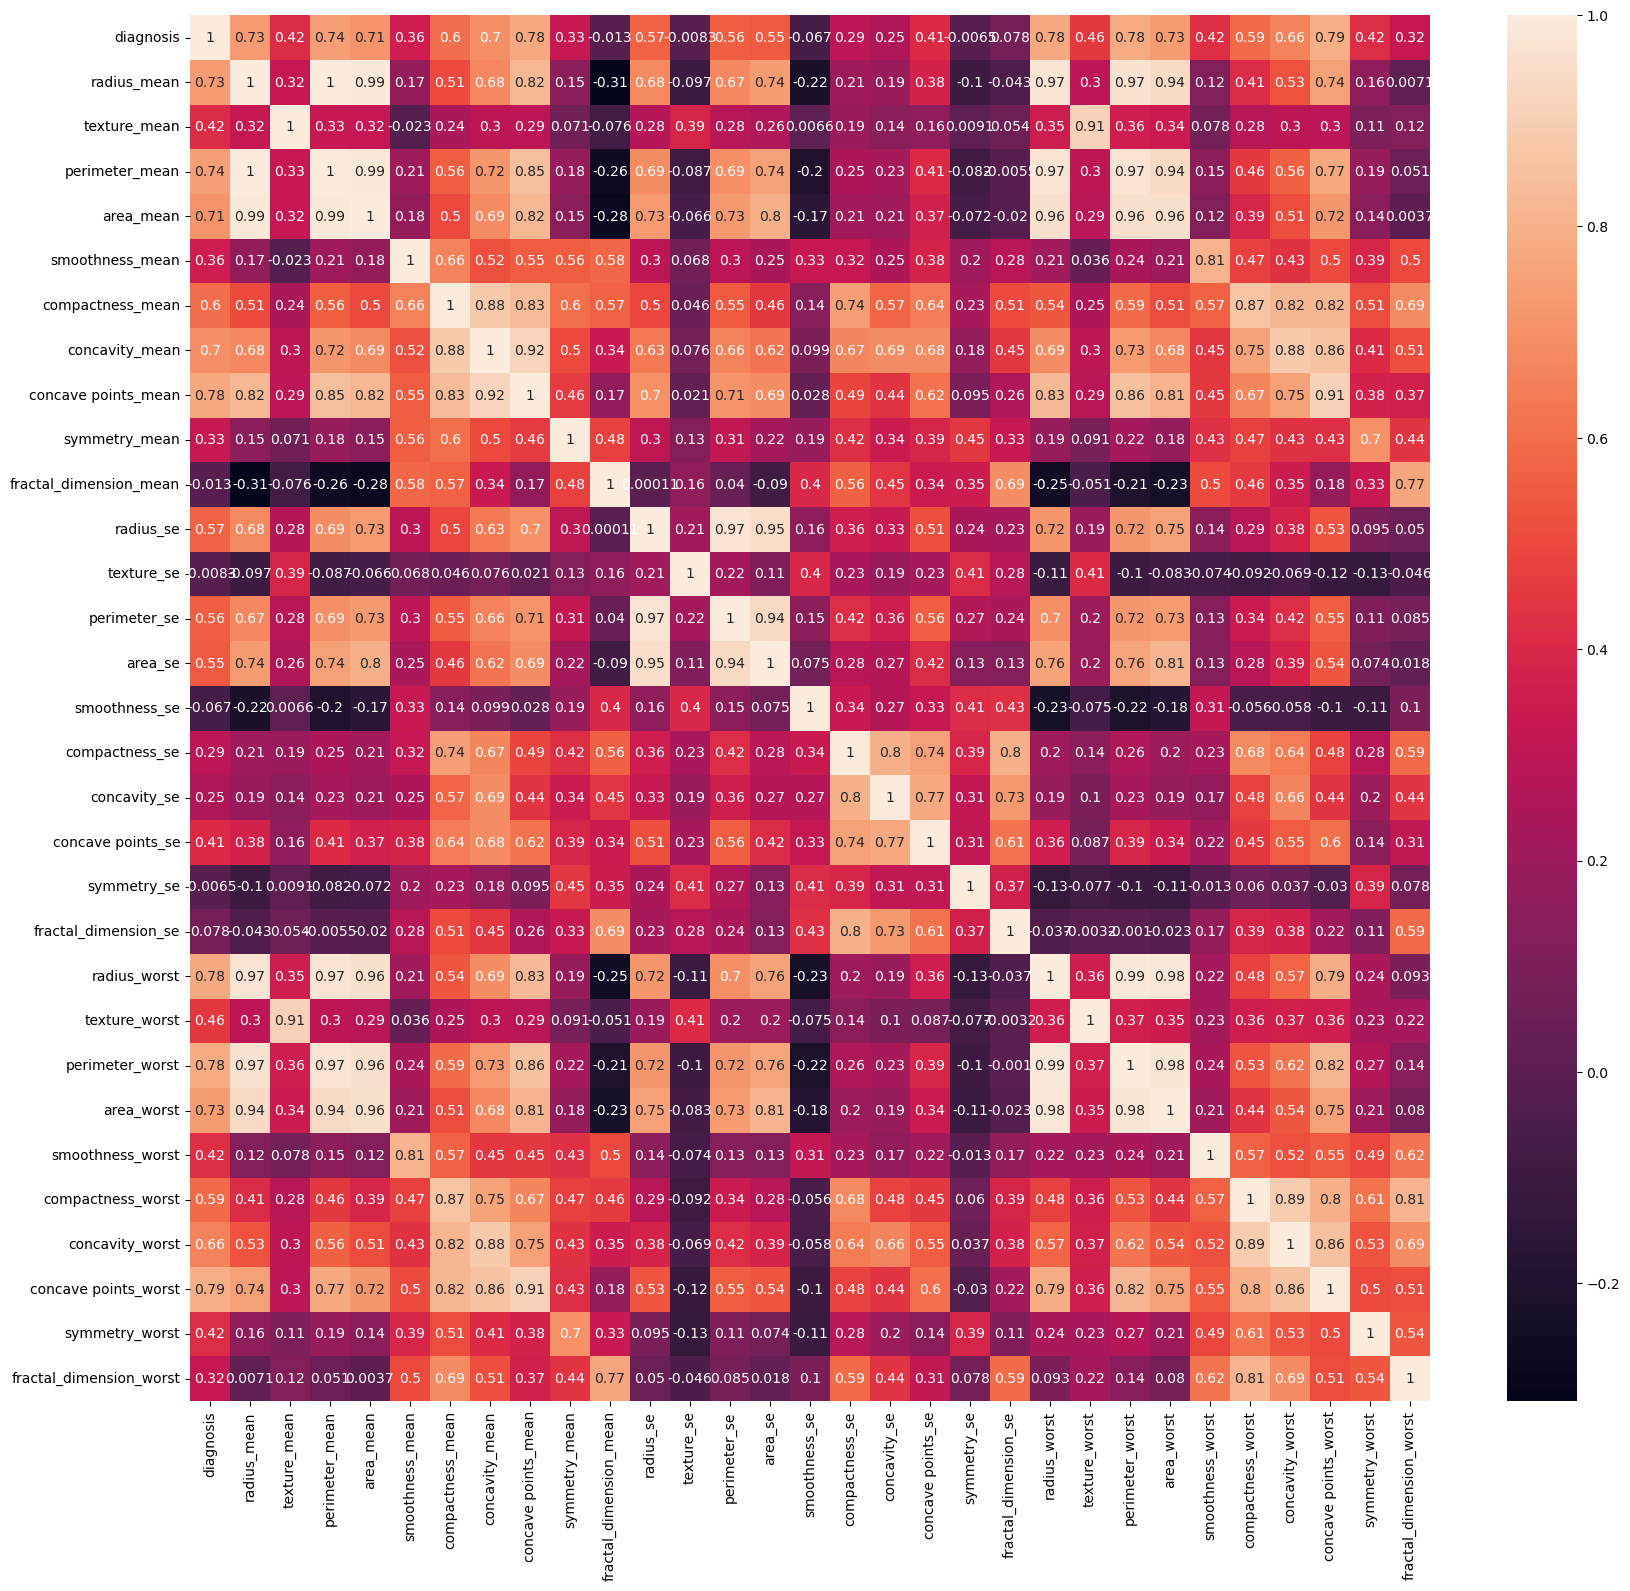

In [9]:
plt.figure(figsize=(20, 18))
sns.heatmap(df.corr(), annot=True)
plt.show()

### 3. Subset & Normalize

Subset the data to only include all columns except diagnosis.

In [12]:
# ANSWER
y = df['diagnosis']
X = df.drop(columns = ['diagnosis'], axis = 1)

In [17]:
# Normalizing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Calculate correlation matrix

We will be using the correlation matrix to calculate the eigenvectors and eigenvalues.

In [23]:
# ANSWER
correlation_matrix = np.corrcoef(X_scaled.T)

### 4. Calculate the eigenvalues and eigenvectors from the correlation matrix

numpy has a convenient function to calculate this:

    eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

In [24]:
# ANSWER
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

### 5. Calculate and plot the explained variance

A useful measure is the **explained variance**, which is calculated from the eigenvalues.

The explained variance tells us how much information (variance) is captured by each principal component.

### $$ ExpVar_i = \bigg(\frac{eigenvalue_i}{\sum_j^n{eigenvalue_j}}\bigg) * 100$$

In [25]:
def calculate_cum_var_exp(eig_vals):
    '''
    Calculate Explained Variance from Eigenvalues

    Return a list containing the cumulative explained variance
    '''
    
    total_variance = np.sum(eig_vals)
    cum_var_exp = []
    current_cum_var = 0
    
    for val in eig_vals:
        current_cum_var += (val / total_variance) * 100
        cum_var_exp.append(current_cum_var)
    
    return cum_var_exp

In [26]:
def plot_var_exp(eig_vals):

    cum_var_exp = calculate_cum_var_exp(eig_vals)

    plt.figure(figsize=(9,7))

    component_number = [i+1 for i in range(len(cum_var_exp))]

    plt.plot(component_number, cum_var_exp, lw=7)

    plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
    plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')

    ax = plt.gca()
    ax.set_xlim([1,30])
    ax.set_ylim([-5,105])

    ax.set_ylabel('cumulative variance explained', fontsize=16)
    ax.set_xlabel('component', fontsize=16)

    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(12)

    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(12)

    ax.set_title('component vs cumulative variance explained\n', fontsize=20)

    plt.show()

### 6. Using sklearn For PCA

    from sklearn.decomposition import PCA
    
- Create an instance of PCA
- Fit X
- Plot the explained variance
- Define n_components
    - n_component
- Apply dimensionality reduction to X
    - transform
- Create PairPlot of PCA

In [27]:
# ANSWER
# Create an instance of PCA
from sklearn.decomposition import PCA

pca = PCA()

# Fit Xs
pca.fit(X)

PCA()

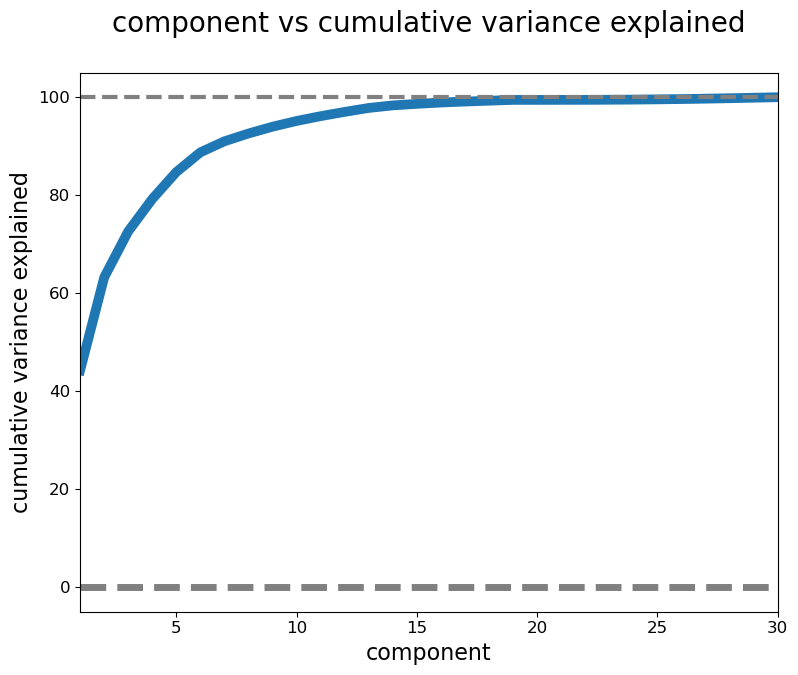

In [29]:
# ANSWER
# Plot explained_variance_
plot_var_exp(eigenvalues)

In [38]:
# ANSWER
# Apply dimensionality reduction to Xs using transform

# The PCA instance created above was for the sole purpose of plotting the graph
# Using it it to fit_transform X wouldn't really reduce dimension so I'm creating a new instance of the PCA
# The n_components where the graph starts flattening (the elbow) is around 15. This will be the value used for the new PCA

new_PCA = PCA(n_components=15)
X_PCA = new_PCA.fit_transform(X)

In [39]:
# This is not being asked for but I'm curious on what the X_PCA looks like as a dataframe (it returns numpy array which is hard to read)

df_pca = pd.DataFrame(data=X_PCA, columns = [f'PC{i+1}' for i in range(X_PCA.shape[1])])
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,1160.142574,-293.917544,48.578398,-8.711975,32.000486,1.265415,0.931337,0.148167,0.745463,0.589359,-0.307804,0.043452,0.034777,0.065069,-0.012934
1,1269.122443,15.630182,-35.394534,17.861283,-4.334874,-0.225872,-0.046037,0.200804,-0.485828,-0.084035,0.080642,0.033042,0.045485,-0.005534,0.021368
2,995.793889,39.156743,-1.709753,4.199340,-0.466529,-2.652811,-0.779745,-0.274026,-0.173874,-0.186994,0.279174,-0.020464,0.083505,0.024824,-0.026887
3,-407.180803,-67.380320,8.672848,-11.759867,7.115461,1.299436,-1.267304,-0.060555,-0.330639,-0.144155,0.927471,-0.174720,0.282556,0.080057,0.043201
4,930.341180,189.340742,1.374801,8.499183,7.613289,1.021160,-0.335522,0.289109,0.036087,-0.138502,0.042228,-0.062721,-0.114247,0.002274,-0.019548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1414.126684,110.222492,40.065944,6.562240,-5.102856,-0.395424,-0.786751,0.037082,-0.452530,-0.235185,0.163649,0.052543,-0.075032,-0.015211,-0.061390
565,1045.018854,77.057589,0.036669,-4.753245,-12.417863,-0.059637,0.449831,0.509154,-0.449986,0.493247,0.007625,0.055832,-0.015163,0.009985,0.003312
566,314.501756,47.553525,-10.442407,-9.771881,-6.156213,-0.870726,-2.166493,-0.442279,-0.097398,-0.144667,-0.109147,0.076263,-0.004448,-0.055285,-0.012459
567,1124.858115,34.129225,-19.742087,-23.660881,3.565133,4.086390,-1.705401,-0.359964,0.385030,0.615467,0.307166,-0.028224,0.060561,-0.037742,-0.031873


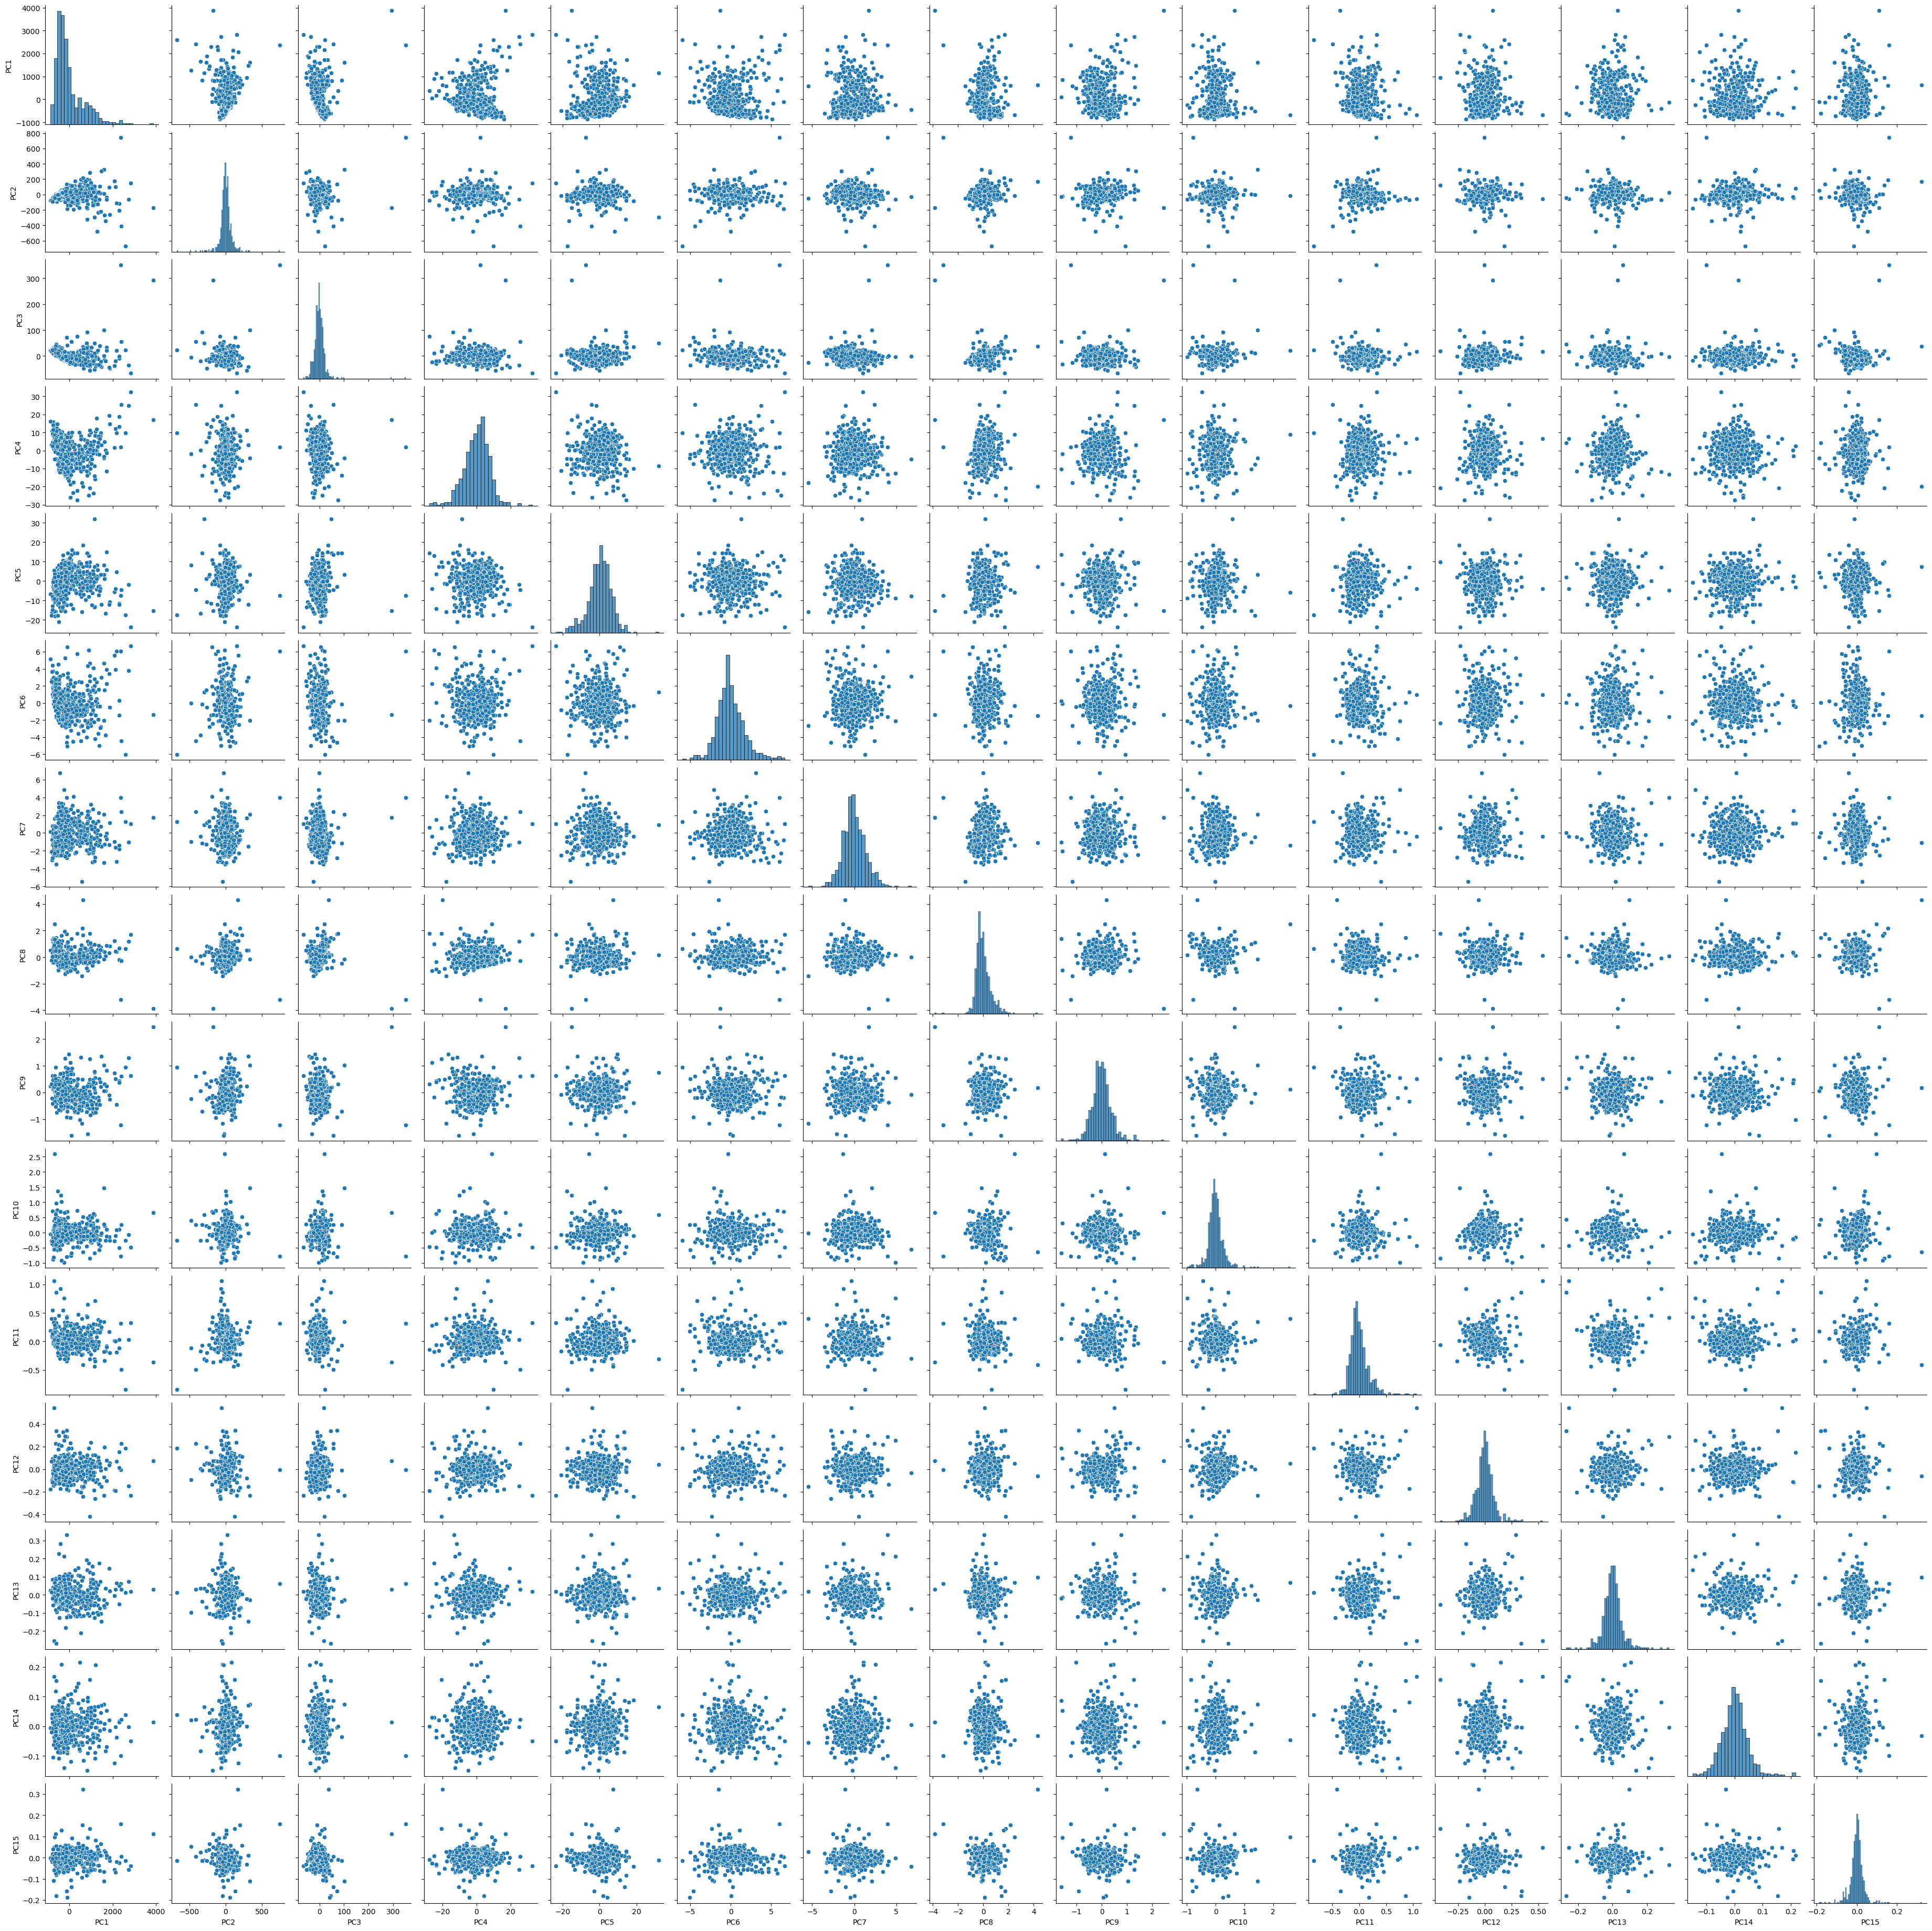

In [40]:
# ANSWER
# Create PairPlot of PCA
sns.pairplot(df_pca)

### 7. Split Data to 80/20 and use PCA you got in step 6 as X

Split data 80/20 and Use KNN to find score.

In [44]:
# ANSWER
# Split Data
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
# ANSWER
y_test_pred = knn.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_acc*100:.2f}%")

Test Accuracy: 95.61%


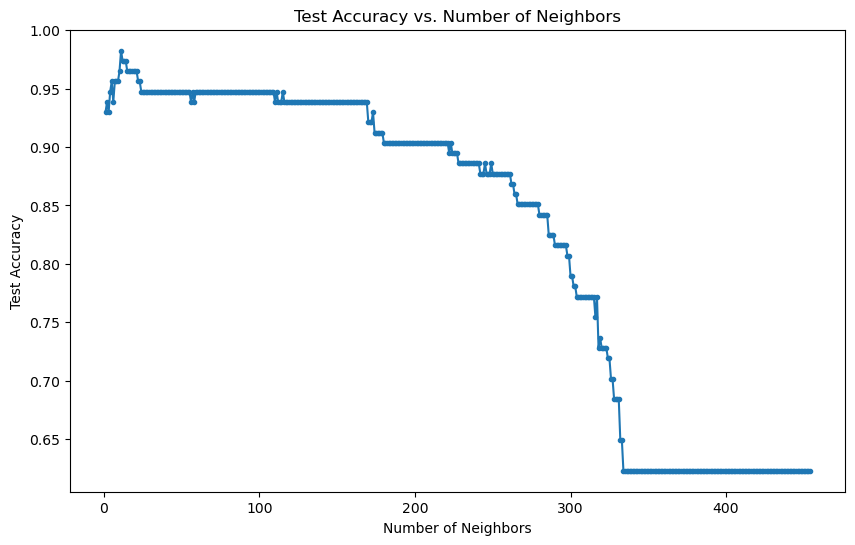

In [48]:
# The instruction doesn't really say how many n_neighbors we should train the model with so I did a for loop to find best value:
n_neighbors_num = X_train.shape[0]
accuracy_list = []

for i in range(1, n_neighbors_num):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    accuracy_list.append(test_acc)
    
plt.figure(figsize=(10,6))
plt.plot(range(1, n_neighbors_num), accuracy_list, marker='.', linestyle='-')
plt.title('Test Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Test Accuracy')
plt.show()

In [51]:
best_k = accuracy_list.index(max(accuracy_list)) + 1
print(f'The best k for the KNN would be {best_k}, giving accuracy of {max(accuracy_list)*100:.2f}%')

The best k for the KNN would be 11, giving accuracy of 98.25%


**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Breast Cancer Machine Learning Prediction](https://gtraskas.github.io/post/breast_cancer/)

[Understanding PCA (Principal Component Analysis) with Python](https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21)



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



